In [41]:
import keras as k
import os
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import seaborn as sns

## load dataset

In [43]:
from keras.utils import to_categorical
from keras.datasets import cifar10

num_classes = 10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows = 32
img_cols = 32
channels= 3

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)

input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## normalize data

In [44]:
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

y_train = k.utils.to_categorical(y_train, num_classes)
y_test = k.utils.to_categorical(y_test, num_classes)

x_train, x_valid, y_train,y_valid = train_test_split(x_train, y_train, test_size=0.20, random_state=42)
x_train.shape , y_train.shape
#print(y_train.shape)

((40000, 32, 32, 3), (40000, 10))

## Model 

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
opt = k.optimizers.Adam(learning_rate= 1e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 64)        0         
                                                      

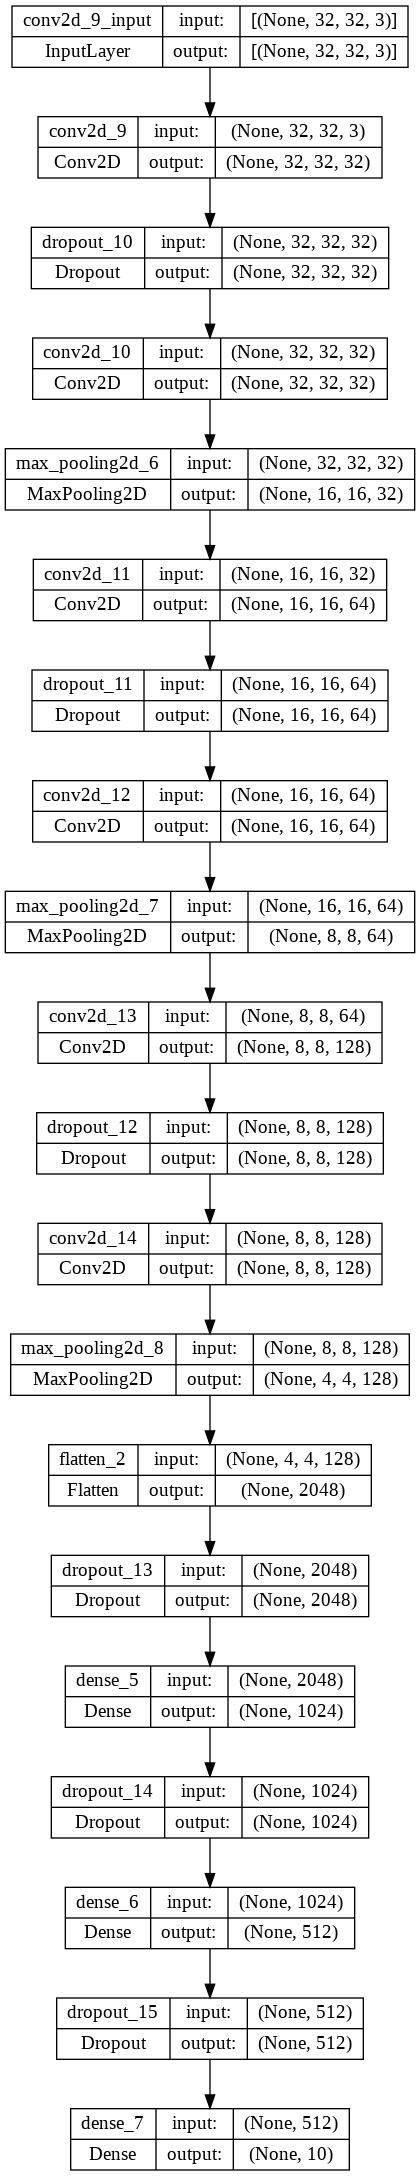

In [9]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

## trian model

In [10]:
epochs = 60
batch_size = 128
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_valid, y_valid),
              shuffle=True)
  

Epoch 1/60
313/313 [==============================] - 18s 22ms/step - loss: 1.9537 - accuracy: 0.2845 - val_loss: 1.7477 - val_accuracy: 0.3816
Epoch 2/60
313/313 [==============================] - 5s 17ms/step - loss: 1.6239 - accuracy: 0.4091 - val_loss: 1.5371 - val_accuracy: 0.4512
Epoch 3/60
313/313 [==============================] - 5s 17ms/step - loss: 1.4792 - accuracy: 0.4610 - val_loss: 1.4554 - val_accuracy: 0.4871
Epoch 4/60
313/313 [==============================] - 5s 17ms/step - loss: 1.3811 - accuracy: 0.4974 - val_loss: 1.3455 - val_accuracy: 0.5315
Epoch 5/60
313/313 [==============================] - 5s 17ms/step - loss: 1.2962 - accuracy: 0.5319 - val_loss: 1.2722 - val_accuracy: 0.5517
Epoch 6/60
313/313 [==============================] - 5s 17ms/step - loss: 1.2252 - accuracy: 0.5595 - val_loss: 1.1813 - val_accuracy: 0.5900
Epoch 7/60
313/313 [==============================] - 5s 17ms/step - loss: 1.1649 - accuracy: 0.5800 - val_loss: 1.0954 - val_accuracy: 0.616

## report

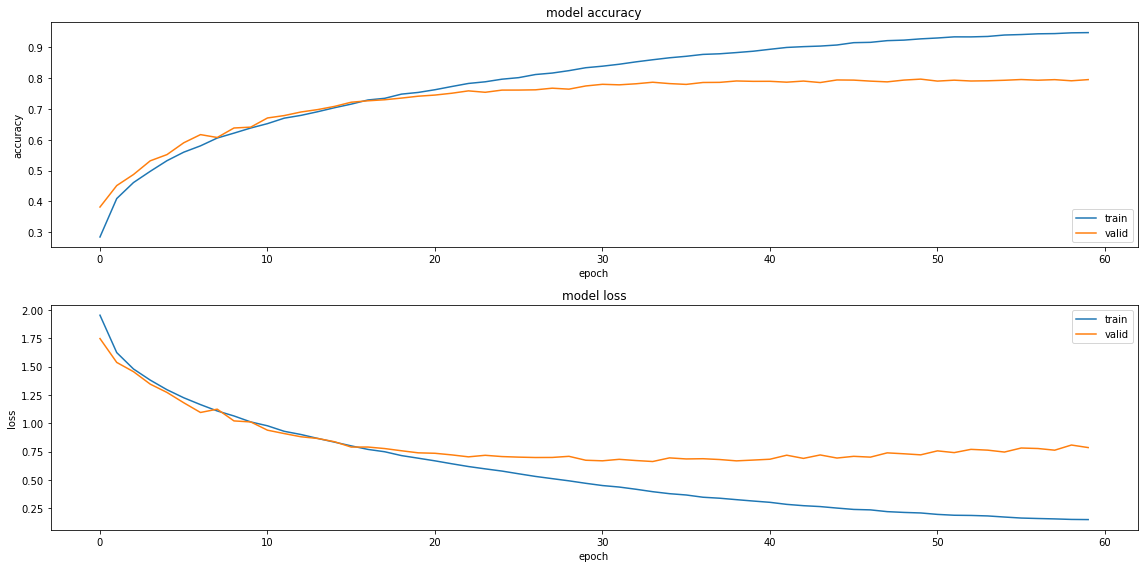

In [42]:
plt.figure(figsize =(16, 8))

save_dir = "./"
model_name = 'keras_cifar.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')


plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')


plt.tight_layout()

In [19]:
y_pred =  model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [40]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.8241 - accuracy: 0.7834
Test loss: 0.82411789894104
Test accuracy: 0.7833999991416931


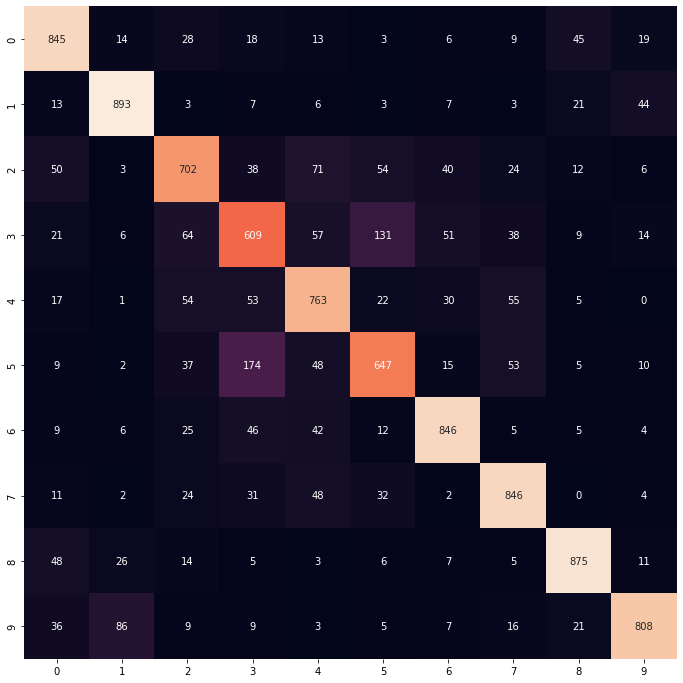

In [39]:
plt.figure(figsize = (12, 12 ))

conf_matrix = confusion_matrix( np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(conf_matrix,  square=True, 
    annot= True ,  fmt ="d", cbar= False,
    #xticklabels=iris.target_names, yticklabels=iris.target_names
        )

plt.show()


